<img src="https://github.com/ChrushedArc/ChrushedArc-Test/raw/main/Snip.PNG">

**REGRESSION TEAM TS1**


---

# Table of Contents <a class="anchor" id="Table_of_Contents"></a>

* [Table of Contents](#Table_of_Contents)
* [Introduction](#Intro)
  * [Problem Statement](#Problem_Statement)
  * [Background/Context](#Background_Context)
  * [Supervised Learning as a Problem Solving Tool](#SL_as_Tool)
  * [Interplay Between Human Expertise and Regression Model](#Human_Model_Interaction)
* [Packages](#Packages)
  * [Importing Packages for Exploratory Data Analysis](#Importing_Packages)
* [Data Import and Inspection](#Data_Import)
* [Data Transformation](#Data_Transform)
* [Exploratory Data Analysis](#EDA)
  * [Univariate Analysis - Numerical Features](#Univariate_Numerical)
  * [Univariate Analysis - CategoricalFeatures](#Univariate_Categorical)
  * [Multivariate Analysis](#Multivariate_Analysis)
  * [Insight on the EDA](#EDA_Insight)
* [Feature Selection and Engineering](#Feature_Selection)
  * [Dummy Variable Encoding](#Dummy_Encoding)
  * [Correlation and Variable Selection](#Variable_Selection)
* [Regression Models](#Regression_Model)
  * [Multiple Linear Regression](#MLR)
  * [Ridge Regression](#Ridge)
  * [Lasso Regression](#Lasso)
  * [Decision Tree](#DT)
  * [Bootstrapping](#BS)
  * [Random Forest](#RF)
  * [Gradient Boosting](#GB)
  * [Light Gradient Boosting](#LGB)
  * [Model Performance Evaluation](#MPE) 
* [Final Comments](#Final_Comments)
* [Appendix - Kaggle Submission](#Kaggle)

# **INTRODUCTION** <a class="anchor" id="Intro"></a>

**PROBLEM STATEMENT** <a class="anchor" id="Problem_Statement"></a>

There is a need within the apple industry to be able to accurately predict how to set the price per kilogram of golden delicious apples.

**BACKGROUND/CONTEXT** <a class="anchor" id="Background_Context"></a>

The apple industry, like many other fresh produce sectors, faces a delicate balance between supply and demand and how to set their prices accordingly. If prices are set too low, profit will fall, whilst if prices are set to high, then there is the risk of apple sales not being high enough. The knock on effect of poor sales is that a large volume of stock goes to waste.

We have access to dataset containing multiple numerical and categorical features. Using these variables, we are going to train a supervised regression model which will aim to accurately predict the price of golden delicious apples per kilogram, given a set of features.

**SUPERVISED LEARNING AS A PROBLEM SOLVING TOOL** <a class="anchor" id="SL_as_Tool"></a>

We will be building a regression model, through supervised learning, in order to accurately predict the recommended average price per kilogram of golden delicious apples in the coming years. The average price/ target variable will be shifted depending on the value(s) of a select number of numerical and categorical features.

While no model can accurately predict every outcome with one hundred percent certainty, a well trained and a well evaluated model can provide appropriate estimations of the target variable. 

**INTERPLAY BETWEEN HUMAN EXPERTISE AND REGRESSION MODEL** <a class="anchor" id="Human_Model_Interaction"></a>

No regression model, no matter how complex or accurate, should serve as the absolute decision maker when deciding on business strategy. Well trained machine learning models can definitely provide valuable insights into the interactions of key variables but they cannot replace industry expertise.

For example, the regression model below may give insight into how a categorical variable may affect the average price of apples but experienced farmers, retailers and distributors in the apple industry receive this information and choose to not implement the recommended price shifting due to their own expertise in the field. 

Furthermore, apple farmers could be consulted in order to identify more potential dependent variables that could potentially play a key role in affecting the target variable. This would also involve having access to the right, clean and pre-processed data.

# **PACKAGES** <a class="anchor" id="Packages"></a>

IMPORTING PACKAGES FOR EXPLORATORY DATA ANALYSIS <a class="anchor" id="Importing_Packages"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math
from scipy import stats
import math
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

MORE PACKAGES WILL BE IMPORTED FOR THE REGRESSION MODEL(S)

# **DATA IMPORT AND INSPECTION** <a class="anchor" id="Data_Import"></a>

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/ChrushedArc/ChrushedArc-Test/main/df-train_set.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ChrushedArc/ChrushedArc-Test/main/df-test_set.csv')

Before analysing the data, it is imperative to examine the dataset for any notable anomalies. 
We begin by assesing the shape (number of rows and columns) of the dataframe, as well as data type of each column. It is also useful to call the .head() on the dataframe in order to glance at the first five rows.

In [3]:
df_train.shape

(64376, 13)

In [4]:
df_test.shape

(685, 13)

The training dataframe contains **64376** rows and **13** columns. One of these columns is the target variable - average price of a kilogram of apples - and thus there are **12** feature variables. The test data contains **685** rows and **13** columns

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


Here we can see that we contain both numerical and categorical feature variables. Numerical and feature variables will get subjected to different Exploratory Data Analysis techniques.

The categorical feature columns are 

```
Province, Container, Size_Grade and Commodities.

```
Meanwhile, the numerical feature columns are 

```
Weight_Kg, Low_Price, High_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, Stock_On_Hand, avg_price_per_kg, 
```
Furthermore, the column 

```
Date
```
can be a useful feature in order to track the interplay of other features interacting over time.






In [6]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [7]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


Lastly, we want to check as to whether there is any missing/null data entries


In [8]:
df_train.isnull().sum() # allows us to view the number of missing data values per column()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [9]:
df_test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

It seems that there are no missing values in the data sets

From the test set we can see that the Commodities only contain the APPLE GOLDEN DELICIOUS. Therefore we can subset the training data to follow the same suit.

In [10]:
golden_apple_train = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS']
golden_apple_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


# **DATA TRANSFORMATION** <a class="anchor" id="Data_Transform"></a>

Currently, the data in the Date column is in string format. It is conventional then, to convert this data to datetime format. Furthermore, it may prove useful to aggregate this datetime data into quarterly, monthly and yearly data. This can be achieved by creating new columns for these attributes.

In [11]:
#Getting the months and quarters for the dates
golden_apple_train.date = pd.to_datetime(golden_apple_train.Date) # Converts the data to datetime format
golden_apple_train["Quarter"] = golden_apple_train.date.dt.quarter # Creates a new columns with quarter data values
golden_apple_train["Month"] = golden_apple_train.date.dt.month # Creates a new column with month data values
golden_apple_train["Year"] = golden_apple_train.date.dt.year

golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


There is no need, now, to retain the 'Date' column. Therefore, it is dropped in the cell below.

In [12]:
golden_apple_train = golden_apple_train.drop('Date', axis=1) # We drop the data column after transforming the date as described
golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


We wish to also be able to assess whether the season when which the observation was made has any bearing on the avg_price_per_kg. In order to to this, we create a function, season(), which uses the transformed date values to assign each month to its respective season.

In [13]:
"""This function, season() takes the integer value of each month and uses this integer value to assign each observation to one
of the four seasons."""

def season(df):
    
    
    season = []

    for month in df['Month']:
        
         if 3 <= month <= 5:
                
            season.append('Autumn')

         if 6 <= month <= 8:
            season.append('Winter')

         if 9 <= month <= 11:
            season.append('Spring')

         if month == 1:
            season.append('Summer')

         if month == 2:
            season.append('Summer')

         if month == 12:
            season.append('Summer')

  

    df['Season'] = season

    return df

In [14]:
golden_apple_train = season(golden_apple_train) # Applying the newly defined function to the training data.
golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020,Spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020,Autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020,Autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020,Spring


## TARGET VARIABLE IDENTIFICATION

The target variable is the average price per kilogram of the golden delicious apples.

# **EXPLORATORY DATA ANALYSIS** <a class="anchor" id="EDA"></a>


Exploratory Data Analysis (EDA) is a vitally important step in the Data Science Process. EDA consists of comprehensively examining the dataset before using the the dataset in training a model. The core of EDA involves identifying key relationships that exist between features in the dataset and how these features interact to alter the target variable.
EDA includes performing univariate and multivariate analysis using a myriad of statistical and data visualisation techniques.




## UNIVARIATE ANALYSIS - NUMERICAL FEATURES <a class="anchor" id="Univariate_Numerical"></a>


Univariate EDA entails assesing each variable individually (both in a graphical and non-graphical sense). Non-graphically univariate EDA methods include exploring the spread of the numerical features.

By calling 

```
df.describe()

```
we are given a comprehensive breakdown of several key summary statistics of each numerical feature.



In [15]:
golden_apple_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,2.239754,5.609119,2019.968238
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,0.908357,2.687248,0.175412
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,1.000000,1.000000,2019.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,1.000000,3.000000,2020.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,2.000000,6.000000,2020.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,3.000000,7.000000,2020.000000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,4.000000,12.000000,2020.000000


In [16]:
golden_apple_train.quantile(0.85)

Weight_Kg              18.30
Low_Price             160.00
High_Price            180.00
Sales_Total         37320.00
Total_Qty_Sold        339.70
Total_Kg_Sold        5380.20
Stock_On_Hand         793.35
avg_price_per_kg        9.15
Quarter                 3.00
Month                   8.00
Year                 2020.00
Name: 0.85, dtype: float64

The 25%, 50% and 75% metrics relate to the 25th, median and 75th percentiles respectively. It is important to not directly compare the means ( and other summary metrics) between different variables. At least not performing any standardisation first. 

Additionally, there are two further metrics that can be calculated. 

```
df.skew()
```
allows one to assess whether a numerical feature is skewed either to the left or right (i.e not normally distributed/symetrical about the median). Whilst

```
df.curtosis()
```
allows one to evaluate whether or not there is a high prevelance of outliers present in each of the numerical features.




In [17]:
golden_apple_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
Quarter            -0.112794
Month               0.078651
Year               -5.344208
dtype: float64

Here we can see that each numerical feature has a skew value of greater than 1. Thus each variable can be deemed to be significantly skewed to the right.

In [18]:
golden_apple_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
Quarter             -1.175297
Month               -0.620111
Year                26.587803
dtype: float64

It can be assumed, based on the above skewness and kurtosis numbers that these numerical features have a high prevelance of outliers. However, further analysis in a graphical form is required.

## GRAPHICAL UNIVARIATE ANALYSIS - HISTOGRAM


In order to view each numerical feature in a seperate graph but without having to write code for each seperate numerical feature, we create a list containing the names of all of the relevant numerical columns.

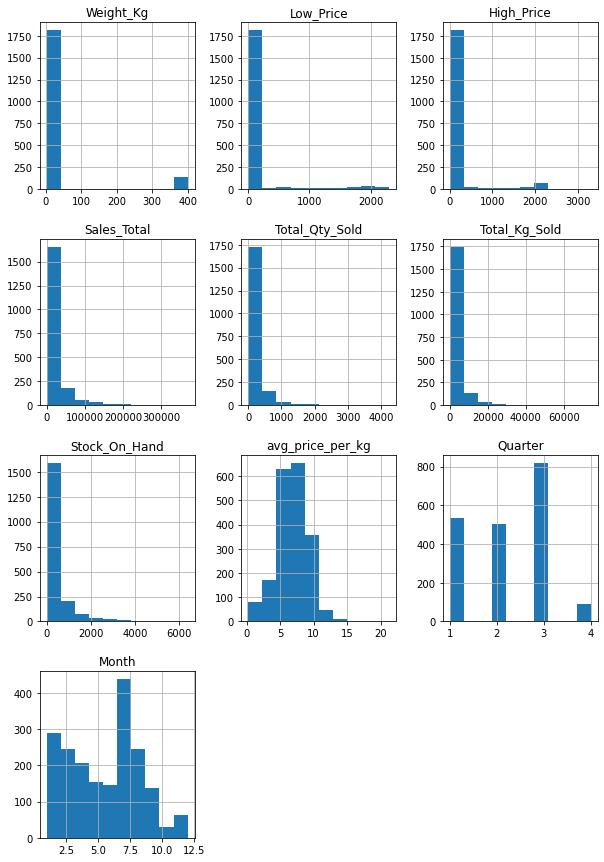

In [19]:
num_features = ['Weight_Kg', 
                'Low_Price', 
                'High_Price', 
                'Sales_Total', 
                'Total_Qty_Sold', 
                'Total_Kg_Sold', 
                'Stock_On_Hand', 
                'avg_price_per_kg', 
                'Quarter', 
                'Month',
               'Season']

golden_apple_train[num_features].hist(figsize=(10,15), sharex=False)
plt.show()

## DISTRIBUTION PLOT

Addtionally, we can create distribution plots to accompany the above histograms for the numerical features.

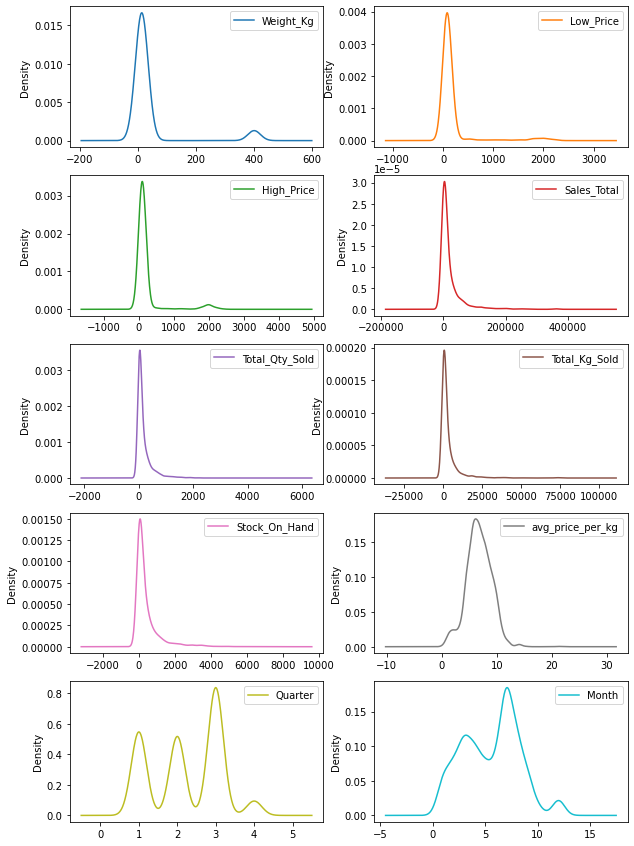

In [20]:
golden_apple_train[num_features].plot(kind='density', subplots=True, layout=(5,2), sharex=False, figsize=(10,15)) # Creates the distribtuion plots, using matplotplib.pyplot, for each numerical feature
plt.show()

## **UNIVARIATE ANALYSIS - CATEGORICAL ANALYSIS** <a class="anchor" id="Univariate_Categorical"></a>

## BAR CHART

A common EDA method for categorical features is to create countplots and bar charts, generally depending on the specific data type of the feature in question.

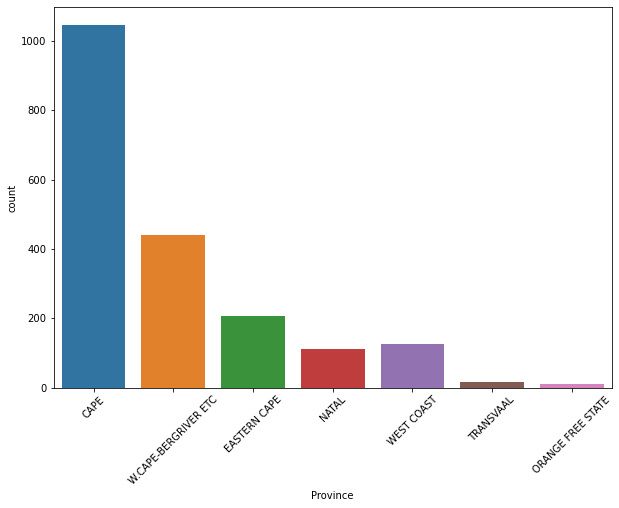

In [21]:
plt.subplots(figsize=(10,7)) # This increases the size of the chart.
sns.countplot(x='Province', data=golden_apple_train) # Creates a count of the no. of observations located in each province.
plt.xticks(rotation=45) # Rotates the labels on x-axis to make them more reader-friendly.
plt.show()

We see here that the large majority of the apples come from the cape provinces.

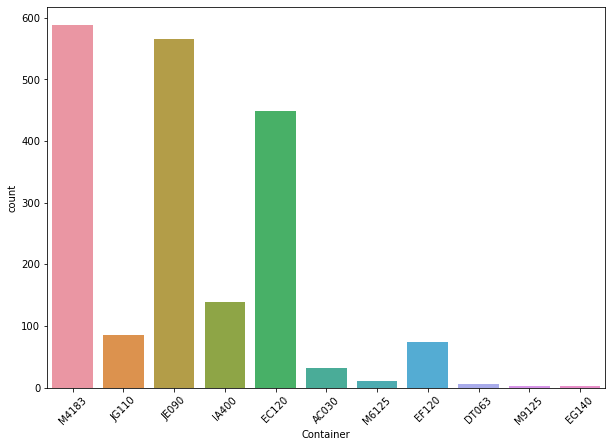

In [22]:
plt.subplots(figsize=(10,7)) # This increases the size of countplot.
sns.countplot(x='Container', data=golden_apple_train) # Creates a countplot of the no. of observations using the various container types
plt.xticks(rotation=45)
plt.show()

The above graph shows the distribution of the different containers.

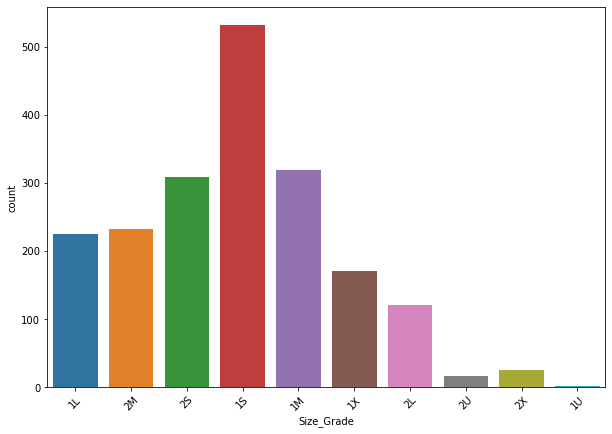

In [23]:
plt.subplots(figsize=(10,7)) # This increases the size of the countplot.
sns.countplot(x='Size_Grade', data=golden_apple_train) # Creates a countplot of the no. of observations corresponding to each size grade
plt.xticks(rotation=45)
plt.show()

The above plot shows that the '1s' size grade is the most prevelant of all the sizes.

## **MULTIVARIATE ANALYSIS** <a class="anchor" id="Multivariate_Analysis"></a>


Multivariate EDA entails exploring and assessing any potential relationships between features. 

**Non-graphical multivariate** analysis involves finding the correlation coefficients between all relevant numerical features.

The Pearson's correlation coeffiecient is a common correlation metric used to make an inital assessment of the relationship between two numerical variables in a dataset.

In [24]:
golden_apple_train.corr() # This will return a matrix of Pearson Correlation Coefficients between all numerical feature.

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.042958,0.047613,-0.019772
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,0.024559,0.039084,-0.021276
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.039385,0.047717,-0.018911
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.040985,-0.055853,0.031264
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.037732,-0.058639,0.042132
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,-0.005622,-0.023098,0.030462
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,-0.027354,-0.011749,-0.045846
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.022305,0.005205,-0.135526
Quarter,0.042958,0.024559,0.039385,-0.040985,-0.037732,-0.005622,-0.027354,-0.022305,1.000000,0.952036,-0.351069
Month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,0.952036,1.000000,-0.430853


## GRAPHICAL MULTIVARIATE ANALYSIS - HEATMAP

A convential way to begin **graphical multivariate** analysis is to construct a heatmap displaying the Pearson Ciorrelation Coefficient between **numerical features**

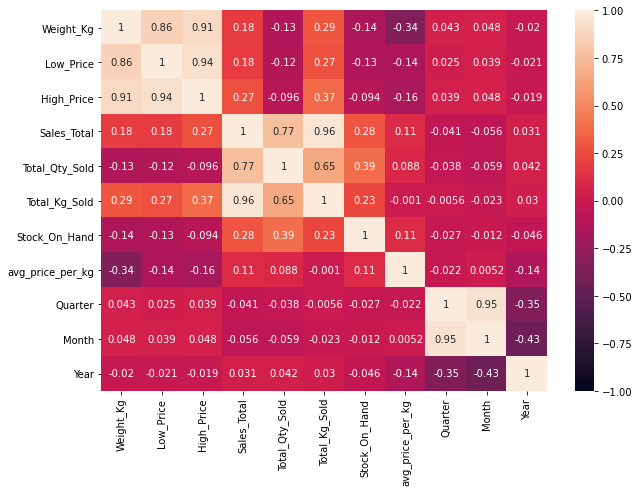

In [25]:
f, ax = plt.subplots(figsize=(10, 7)) # This increases the size of the Seaborn Heatmap.
sns.heatmap(golden_apple_train.corr(), vmin=-1, vmax=1, annot=True) # Creates a Heatmap using seaborn
plt.show() 

These two plots and maps show that there are strong correlations between the predictor variables, but there are no strong correlations between any one predictor variable and the output variable.

## PAIRPLOT

Seaborn provides users with a myriad of visualisations. One such being the Pairplot. This produces a matrix which contains a scatterplot for every possible combination of numerical features in the dataset.

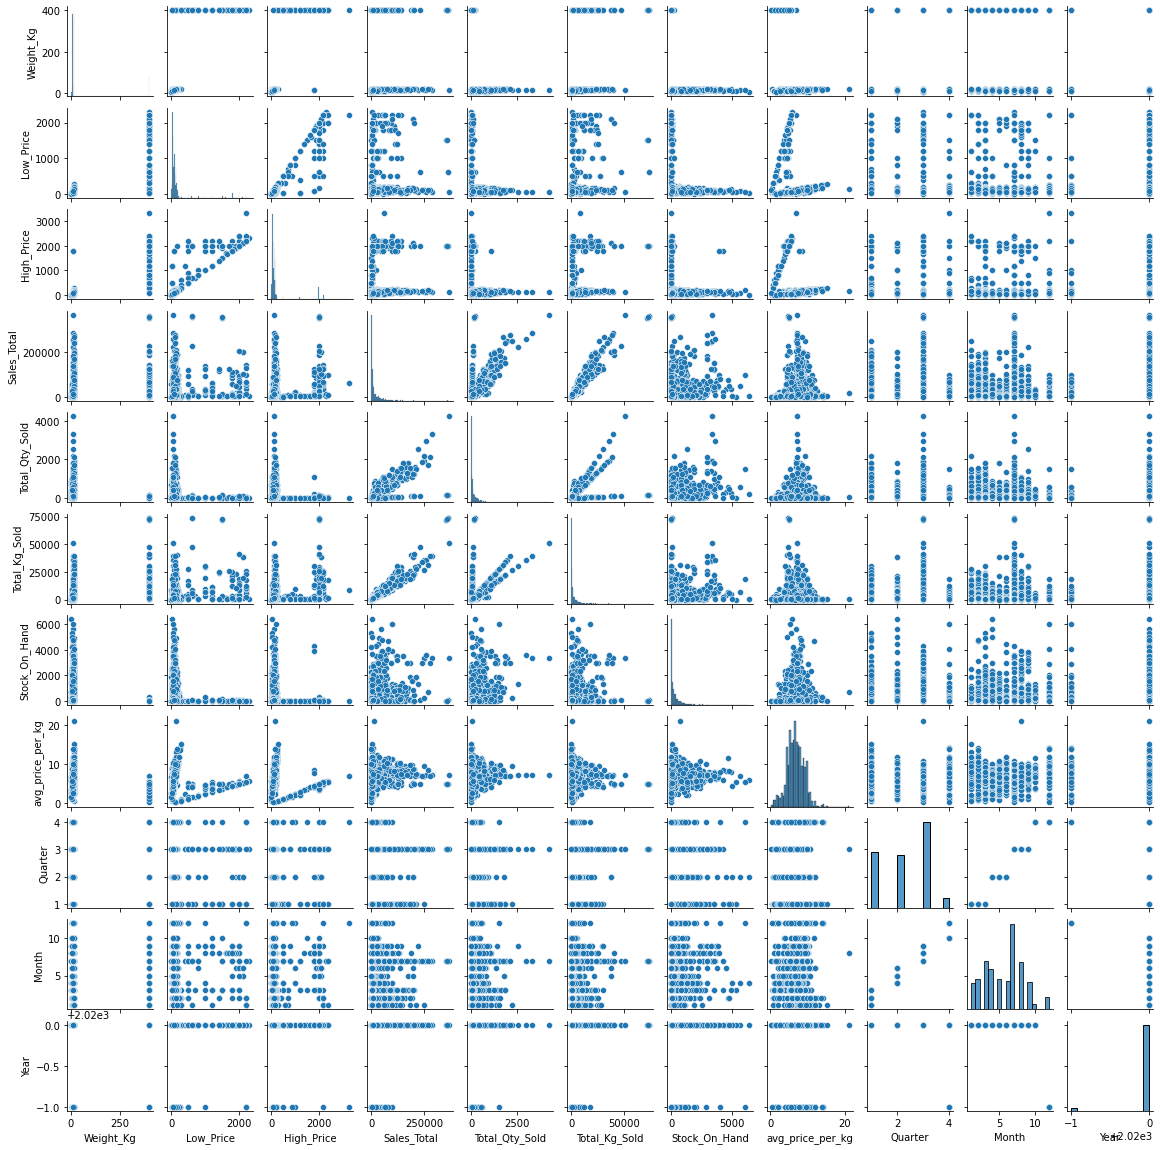

In [26]:
g = sns.pairplot(golden_apple_train) # Creates a Pairplot using Seaborn
g.fig.set_size_inches(16,16) #This increases the size of the pariplot
plt.show()

While there are many scatterplots in the above pairplot matrix, very few plots seem to be showing potential linear relationships between variables. For example, Sales_Total and Total_Kg_Sold appear to have a reasonably sound positive linear relationship. However, even in the this scatterplot, there are a couple of deviating lines towards the top right corner. Additionally, one would expect Sales_Total and Total_Kg_sold to be positvely correlated regardless of what the target variable is.

It looks as though the target variable, avg_price_per_kg, may have a linear relationship with both Quarter and Month which could be explored further


## SCATTERPLOT

The Scatterplot function function is great for assessing whether there is likely to be any linear relationship between two variable. Conveniently, the sns.scatterplot() fucntion has a hue argument which allows the addition of a third variable. The variable chosen often tends to be a categorical feature. Thus we can visualise the potential interplay of two numerical features with a third categorical feature. 

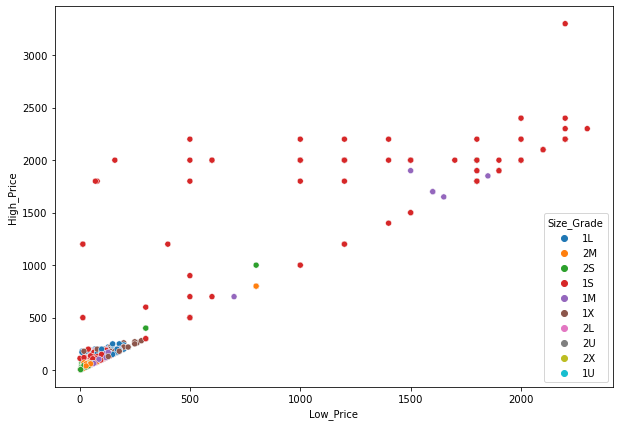

In [27]:
plt.subplots(figsize=(10,7))
sns.scatterplot(x='Low_Price', y='High_Price', hue='Size_Grade', data=golden_apple_train) # Creates a Scatterplot using Seaborn
plt.show()

Unfortunately, we cannot read too much into this scatterplot as the relationship is not linear. Unless, we perform data cleaning to remove all High_Price values above 400 units or so.

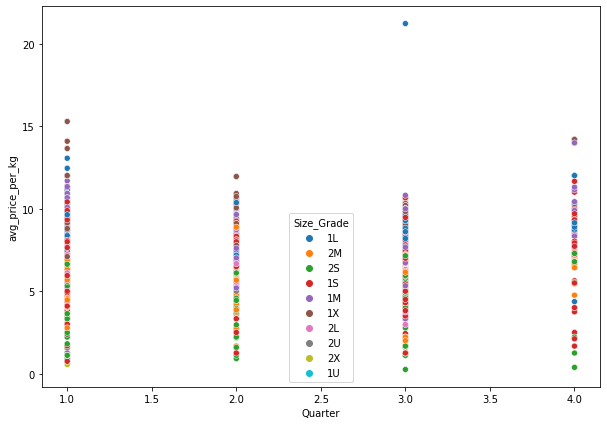

In [28]:
plt.subplots(figsize=(10,7)) # This increases the size of the Scatter plot
sns.scatterplot(x='Quarter', y='avg_price_per_kg', hue='Size_Grade', data=golden_apple_train)
plt.show()

This Scatterplot allows us to visualise that there is perhaps a positive quadratic relationship between Quarter ( an indication of the time of year) and the target variable.

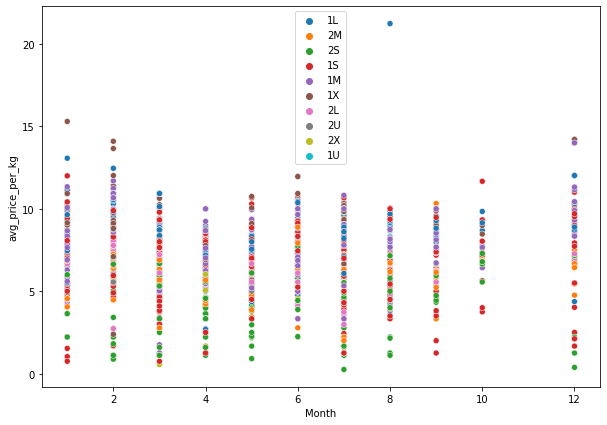

In [29]:
plt.subplots(figsize=(10,7))
sns.scatterplot(x='Month', y='avg_price_per_kg', hue='Size_Grade', data=golden_apple_train)
plt.legend(loc='best')
plt.show()

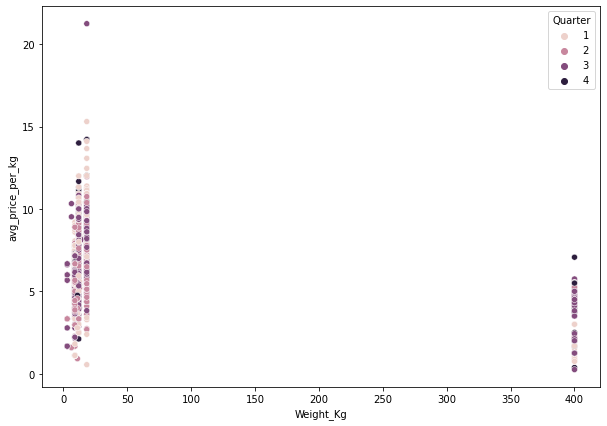

In [30]:
plt.subplots(figsize=(10,7)) # This increases the size of the Scatter plot
sns.scatterplot(x='Weight_Kg', y='avg_price_per_kg', hue='Quarter', data=golden_apple_train)
plt.show()

Due to the heavy contingent of outliers at 400 kg, it is very difficult to know if there could be a linear relationship between these two variables.

## **INSIGHT ON THE EDA** <a class="anchor" id="EDA_Insight"></a>

With the data in this current form, it is very difficult to pin down potential linear relationships to explore further. Thus it makes selecting key predictor variables in order to construct a linear model very challenging. There are definitely predictor variables within this given dataset, they just need to be . This is without any further data cleaning or feature engineering.

Thus, we will attempt to create dummy variables in order to run the categorical data into numeric data. This means that the Container values will carry a specific integer based on their container type name.

# **FEATURE SELECTION AND ENGINEERING** <a class="anchor" id="Feature_Selection"></a>


<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

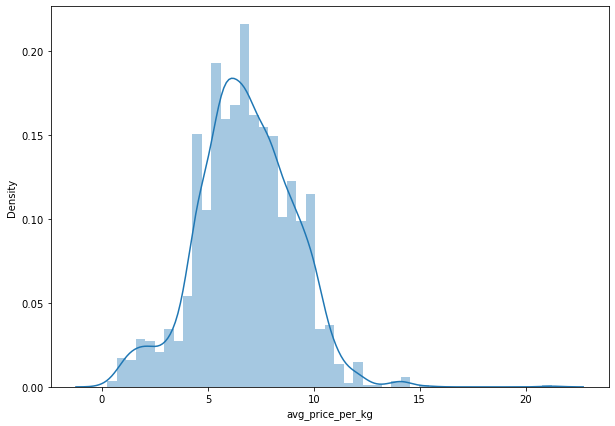

In [31]:
plt.subplots(figsize=(10,7)) # This increases the size of the Distribution Plot.
sns.distplot(golden_apple_train['avg_price_per_kg'],kde=True)

The graph above shows that the average price per kilogram can be approximated by a normal distribution, with a slight right skew.


## DUMMY VARIABLE ENCODING <a class="anchor" id="Dummy_Encoding"></a>


Dummy variable encoding, particularly on a dataset such as this one, is vitally important.

Firstly, most of the numerical features appear to have high levels of outliers, which is skewing the visualisation of the potential relationship that these features may be having without target variable. Thus we have to look at the effects of the categorical features, in conjunction with the numerical features, on the target variable so as to build an informative regression model.

Secondly, regression models cannot make sense of string/text data. Therefore this string, categorical data simply has to be converetd into dummy encoded variables in order for the data to be analysed.

In [32]:
# We get dummy variables for all the columns with catagorical variables, and the first is dropped to avoid the dummy variable trap.
dummy_df = pd.get_dummies(golden_apple_train, drop_first=True) 
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,...,0,0,0,0,0,0,0,1,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,...,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,...,0,0,0,0,1,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,...,0,0,0,0,0,0,0,1,0,0


We expect to see many more columns compared to the number of columns in the golden_apple_train dataset.

In [33]:
dummy_df.columns 

Index(['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg', 'Quarter',
       'Month', 'Year', 'Province_EASTERN CAPE', 'Province_NATAL',
       'Province_ORANGE FREE STATE', 'Province_TRANSVAAL',
       'Province_W.CAPE-BERGRIVER ETC', 'Province_WEST COAST',
       'Container_DT063', 'Container_EC120', 'Container_EF120',
       'Container_EG140', 'Container_IA400', 'Container_JE090',
       'Container_JG110', 'Container_M4183', 'Container_M6125',
       'Container_M9125', 'Size_Grade_1M', 'Size_Grade_1S', 'Size_Grade_1U',
       'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M', 'Size_Grade_2S',
       'Size_Grade_2U', 'Size_Grade_2X', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

Additionally, we will encode for dummy variables on the test dataset.

## VARIABLE SELECTION BY CORRELATION AND SIGNIFICANCE <a class="anchor" id="Variable_Selection"></a>


Variable selection seeks to remove features which do not aid in the performance of a regression model. 
By making this selection, based off of how a feature correlates with the target variable (and the probability associated with this correlation) we aim to reduce multicollinearity in the training data set. Multicollinearity is the result of feature variables which interact with one another, thus making it hard to discern the true underlying efftct of either variable on the outcome variable, thus weakening the relevance of the trained regression model.

In [34]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df=dummy_df.reindex(columns=column_titles)

dummy_df_feature_select = dummy_df.copy() # creates a copy of dataframe for the purpose of performing feature selection

In [35]:
y_data_fs = dummy_df_feature_select['avg_price_per_kg']

x_data_fs = dummy_df_feature_select.drop('avg_price_per_kg', axis=1)

In [36]:
corrs = dummy_df_feature_select.corr()['avg_price_per_kg'].sort_values(ascending=False)
corrs

avg_price_per_kg                 1.000000
Container_M4183                  0.403229
Province_W.CAPE-BERGRIVER ETC    0.262051
Size_Grade_1X                    0.251451
Container_EC120                  0.188162
Season_Summer                    0.185013
Size_Grade_1M                    0.175779
Container_EF120                  0.114297
Sales_Total                      0.108473
Stock_On_Hand                    0.105028
Total_Qty_Sold                   0.087536
Season_Spring                    0.026971
Container_EG140                  0.023753
Container_M6125                  0.007568
Month                            0.005205
Container_M9125                  0.002812
Total_Kg_Sold                   -0.001007
Province_TRANSVAAL              -0.020415
Quarter                         -0.022305
Province_ORANGE FREE STATE      -0.025026
Province_WEST COAST             -0.025122
Size_Grade_1U                   -0.027335
Size_Grade_1S                   -0.028506
Size_Grade_2X                   -0

Calculating p significance associated with each pearson correlation coefficient.

In [37]:
from scipy.stats import pearsonr

column_names = [col for col in corrs.index if col != 'avg_price_per_kg']

dict_cp = {}

for col in column_names:
    p_val = np.round(pearsonr(dummy_df_feature_select[col], dummy_df_feature_select['avg_price_per_kg'])[1], 4)
    dict_cp[col] = {'Correlation_Coefficient': corrs[col], 'P_Value': p_val}
    
corr_p_df = pd.DataFrame(dict_cp).T

corr_p_df


,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.0000
Province_W.CAPE-BERGRIVER ETC,0.262051,0.0000
Size_Grade_1X,0.251451,0.0000
Container_EC120,0.188162,0.0000
Season_Summer,0.185013,0.0000
Size_Grade_1M,0.175779,0.0000
Container_EF120,0.114297,0.0000
Sales_Total,0.108473,0.0000
Stock_On_Hand,0.105028,0.0000
Total_Qty_Sold,0.087536,0.0001


In [38]:
x_names_corr = list(corr_p_df[corr_p_df['P_Value'] < 0.05].index)

X_data_corr = dummy_df_feature_select[x_names_corr]

## CHECKING IF MULTICOLLINEARITY IS REDUCED

However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation. Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

Therefore, we can create a correlation matrix between all remaining feature variables, but only show the the correlation values between features for which the absolute value exceeds a threshold number. The idea is that feature variables with correlation values which exceed this threshold, display multicollinearity which in turn could have an effect on the subsequent regression models.

In [39]:
corr_matrix = X_data_corr.corr() 

corr_matrix[np.abs(corr_matrix) > 0.9] # selects all absolute correlation values which exceed 0.9

,Container_M4183,Province_W.CAPE-BERGRIVER ETC,Size_Grade_1X,Container_EC120,Season_Summer,Size_Grade_1M,Container_EF120,Sales_Total,Stock_On_Hand,Total_Qty_Sold,...,Container_JG110,Low_Price,Size_Grade_2M,High_Price,Province_EASTERN CAPE,Container_JE090,Weight_Kg,Size_Grade_2S,Container_IA400,Province_NATAL
Container_M4183,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province_W.CAPE-BERGRIVER ETC,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1X,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_EC120,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season_Summer,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1M,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_EF120,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock_On_Hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Qty_Sold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
#corr = X_data.corr()

r, c = np.where(np.abs(corr_matrix) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

multicollinearity_matrix = corr_matrix.iloc[r[off_diagonal], c[off_diagonal]]

multicollinearity_matrix

,High_Price,Low_Price,Weight_Kg,Container_IA400,High_Price,Container_IA400,High_Price,Weight_Kg
Low_Price,0.938140,1.000000,0.863182,0.860219,0.938140,0.860219,0.938140,0.863182
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231


While there are not many features which display significant levels of multicollinearity, multiple features display high levels of multicollinearity with 1 or more other feature variables. Thus all of these variables will need to be removed in order to reduce the multicollinearity within the datatset.

In [41]:
# Attain a list of columns which display significant levels of multicollinearity.
high_multicollinearity = list(corr_matrix.iloc[r[off_diagonal], c[off_diagonal]].index.unique())
high_multicollinearity

X_data_corr_keep = [col for col in X_data_corr.columns if col not in high_multicollinearity] # Seelect the column names of the fetures which do not display multicollinearity.


X_data_corr = X_data_corr[X_data_corr_keep] # slice the data based on which columns are retained.

len(X_data_corr.columns)

22

The number of explanatory feature variables, after feature selection by correlation and significance, stands at 22.

## VARIABLE SELECTION BY VARIATION THRESHOLD

Selecting features on the basis on their variance is a method of feature selection/shrinking which aims to select only those features which vary to a respectable degree as the target variable changes. This is in effect, a manual from of dimensionality reduction.


Start the variable selection by again selecting only the explanatory ("X") feature columns.

In [42]:
x_data_var_names = [col for col in dummy_df_feature_select.columns if col != 'avg_price_per_kg'] 

X_data_var = dummy_df_feature_select[x_data_var_names]

X_data_var.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,3,9,2020,...,0,0,0,0,0,0,0,1,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,2,4,2020,...,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,2,4,2020,...,0,0,0,0,1,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,2,5,2020,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,3,9,2020,...,0,0,0,0,0,0,0,1,0,0


## SCALING/NORMALISING X_DATA_VAR

As we are performing feature selection based on the variance of a feature, it is improtant to scale each variable first. We have chosen to Normalise each feature in the dataset. This compresses each feature into the range [0;1] and thus allows for fair comparisons of the respective variances between features.

In [43]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() # Instantiating the Normalising function:

X_scaled = scaler.fit_transform(X_data_var)

X_data_var = pd.DataFrame(X_scaled, columns=X_data_var.columns)

X_data_var.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
0,0.038539,0.064404,0.050076,0.139948,0.078140,0.082065,0.128438,0.666667,0.727273,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.020151,0.020888,0.013657,0.043293,0.075307,0.047529,0.000000,0.333333,0.272727,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.015113,0.023064,0.015175,0.002666,0.004013,0.002149,0.235313,0.333333,0.272727,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.038539,0.033943,0.034901,0.086654,0.091360,0.095915,0.069219,0.333333,0.363636,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.782419,0.544765,0.004858,0.000000,0.005365,0.000313,0.666667,0.727273,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now, we will set the variance threshold using VarianceThreshold from sklearn.

In [44]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.05) # Variance threshold has been set to 0.05.

selector.fit(X_data_var)

selector.variances_

array([0.06297905, 0.0264109 , 0.01730363, 0.01114005, 0.00531191,
       0.00678642, 0.01280664, 0.09163223, 0.0596496 , 0.03075345,
       0.09439562, 0.05363115, 0.0045894 , 0.00762538, 0.17460024,
       0.06038258, 0.00306432, 0.17683418, 0.03647268, 0.00153452,
       0.06613829, 0.20566732, 0.04164891, 0.21049029, 0.00509671,
       0.00153452, 0.13671534, 0.1982624 , 0.00102354, 0.07992827,
       0.05769618, 0.10472655, 0.13289018, 0.00863317, 0.01314226,
       0.07865829, 0.14780973, 0.24417343])

The variances of each feature, after normalisation, can be seen above. However, we are still yet to perform variable selection based on the features' variances.

In [45]:
column_variances = selector.variances_

vars_dict = {}

vars_dict = [{'Variable_name': v_name, 'Variance': v_var} for v_name, v_var in zip(X_data_var.columns, column_variances)]

var_df = pd.DataFrame(vars_dict)

var_df.sort_values(by='Variance', ascending=False) # Sorting the Variances in descending order.

,Variable_name,Variance
37,Season_Winter,0.244173
23,Container_M4183,0.210490
21,Container_JE090,0.205667
27,Size_Grade_1S,0.198262
17,Container_EC120,0.176834
14,Province_W.CAPE-BERGRIVER ETC,0.174600
36,Season_Summer,0.147810
26,Size_Grade_1M,0.136715
32,Size_Grade_2S,0.132890
31,Size_Grade_2M,0.104727


Now we will select only those explanatory variables which exceed the variance threshold that was defined above.

In [46]:
X_data_var = X_data_var[X_data_var.columns[selector.get_support(indices=True)]] # Selecting only those features which have a variance above the threshold.
X_data_var

,Weight_Kg,Quarter,Month,Province_EASTERN CAPE,Province_NATAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_EC120,Container_IA400,Container_JE090,Container_M4183,Size_Grade_1M,Size_Grade_1S,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Season_Spring,Season_Summer,Season_Winter
0,0.038539,0.666667,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.020151,0.333333,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.015113,0.333333,0.272727,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.038539,0.333333,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.666667,0.727273,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,0.022670,0.000000,0.181818,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1948,0.038539,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1949,0.015113,0.333333,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1950,0.020151,0.000000,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
len(X_data_var.columns)

20

This feature selection by variation produced an explanatory feature set containing 17 variables.

# **REGRESSION MODEL** <a class="anchor" id="Regression_Model"></a>

## LEAST SQUARES REGRESSION

The least squares method of regression is a regression mehod that finds the line of best fit through the minimization of the residuals.  This method is used in both single linear regression and multiple linear regression.

## SINGLE LINEAR REGRESSION

Single linear regression aims to modelthe relationship between one feature and one response variable through a linear relationship. The formula is as follows:
$$Y = \beta_{0} + \beta_{1}X_1$$

where:
- $\beta_{0}$ is the intercept, interpreted as the value of $Y$ when $X_1 = 0$;
- $\beta_{1}$ is the coefficient, interpreted as the effect on $Y$ for a one unit increase in $X_1$; and
- $X_1$ is the single predictor variable.

## MULTIPLE LINEAR REGRESSION <a class="anchor" id="MLR"></a>

linear regression aims to modelthe relationship between more than one feature and one response variable through a linear relationship. The formula is as follows:
$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$

where:

- $Y$ is the reponse variable which depends on the $p$ predictor variables;
- $\beta_0$ is the intercept, interpreted as the value of $Y$ when _all_ predictor variables are equal to zero;
- $\beta_j$ is the average effect on $Y$ of a one unit increase in $X_j$, assuming all other predictors are held fixed.

Linear regression typically suffers from high bias, simply because it is often the case that the variables do not follow a linear relationship.  This causes the accuracy of the model to be low in comparison to other types of regression.

We will now perform and test two multiple linear regression models on the data.

## **MODEL IMPORT AND INSTANTIATION** 


In [48]:
from sklearn.linear_model import LinearRegression #We import the linear regression model from sklearn' linear model library
lm = LinearRegression() #We instantiate the regression model using default parameters

## **MODEL TRAINING** <a class="anchor" id="Model_Training"></a>


In [49]:
X = dummy_df.drop('avg_price_per_kg',axis=1).values # Splitting the data into predictors and label.
y = dummy_df['avg_price_per_kg']

In [50]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
lm.fit(X_train, y_train) # Train the model

LinearRegression()

In [52]:
y_pred_mlr = lm.predict(X_test)

In [53]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_mlr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_mlr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)))
print('R Squared:',r2_score(y_test, y_pred_mlr))
print('Adjusted R Squared:',1-(1-r2_score(y_test, y_pred_mlr))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

Mean Absolute Error: 1.0315849979244687
Mean Squared Error: 1.8532857671962126
Root Mean Squared Error: 1.3613543870705425
R Squared: 0.6005944562181693
Adjusted R Squared: 0.5574768122871763


## Fitting same regression model, but fitting it to data that has undergone feature selection

In [54]:
lm_fs = LinearRegression() #We instantiate the regression model using default parameters

In [55]:
X1 = X_data_corr # X_data with features selected according to correlation and significance.
y1 = dummy_df_feature_select['avg_price_per_kg']

In [56]:
# Split data into training and test sets
X_train_f, X_test_f , y_train_f, y_test_f = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [57]:
lm_fs.fit(X_train_f, y_train_f) # Train the model

LinearRegression()

In [58]:
y_pred_mlr_f = lm_fs.predict(X_test_f)

In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_f, y_pred_mlr_f))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_f, y_pred_mlr_f))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_f, y_pred_mlr_f)))
print('R Squared:',r2_score(y_test_f, y_pred_mlr_f))
print('Adjusted R Squared:',1-(1-r2_score(y_test, y_pred_mlr_f))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

Mean Absolute Error: 1.134227275151715
Mean Squared Error: 2.2936378305128877
Root Mean Squared Error: 1.514476091099786
R Squared: 0.5056932497137182
Adjusted R Squared: 0.4523305891714492


We can see from the results that the linear model with feature selection performs worse that the model which uses all of the features.  From this we can see that the straightforward linear model does not work well with the data.

The following models we use have inherent feature selection, therefore we will train the models with all features present

## Ridge Regression <a class="anchor" id="Ridge"></a>

Ridge regression is type of linear regression model that uses scaling methods that is used to analyse  data that suffers from multicollinearity between predictors.  When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values. This was observed in the above instances.

Ridge regression performs L2 regularization, which adds a penality equal to the sum of square values of the magnitude of coefficients.  

The function is as follows: $$\min_{\beta} (RSS + \alpha\sum_{j=1}^pb_j^2)$$

Lambda is the penalty term. λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penality term. The higher the values of alpha, the larger the penality which causes the magnitude of the coefficients to become smaller.  This translates into inherent feature selection, however, the coeffecients will never be zero.

We will first split our data into a training and a testing set. 

Since we are done splitting our dataset, we can go ahead and fit and test our model. For now, we are going to create a `Ridge()` object without modifying any of the parameters. This means that we will use the default value of $\alpha=1$. I

In [60]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

In [61]:
# Split data into predictors and response
X = dummy_df.drop('avg_price_per_kg', axis=1)
y = dummy_df['avg_price_per_kg']

The `Ridge()` function has an alpha argument  that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:

In [62]:
alphas = 10**np.linspace(10,-2,100)*0.5 # We create an array of alpha values to be used in the selection process
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Associated with each alpha value is a vector of ridge regression coefficients, which we'll
store in a matrix `coefs`. In this case, it is a $19 \times 100$
matrix, with 19 rows (one for each predictor) and 100
columns (one for each value of alpha).

In [63]:
ridge = Ridge(normalize = True)# Instantiate the regressor and specify that we want to apply scaling.
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 38)

We now split the samples into a training set and a test set in order
to estimate the test error of ridge regression and the lasso:

In [64]:
# Split data into training and test sets
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

Next we fit a ridge regression model on the training set, and evaluate
its MSE on the test set, using $\lambda = 4$:

In [65]:
ridge2 = Ridge(alpha = 4, normalize = True)# Instantiate the regressor and specify that we want to apply scaling.
ridge2.fit(X_train1, y_train1)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test1)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, pred2)))
print('R Squared:',r2_score(y_test1, pred2))
print('Adjusted R Squared:',1-(1-r2_score(y_test1, pred2))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Weight_Kg                       -1.163428e-03
Low_Price                       -6.245582e-05
High_Price                      -7.863047e-05
Sales_Total                      1.103941e-06
Total_Qty_Sold                   6.067675e-05
Total_Kg_Sold                   -6.943509e-07
Stock_On_Hand                    2.847155e-05
Quarter                         -4.718620e-03
Month                            3.139523e-03
Year                            -2.767573e-01
Province_EASTERN CAPE           -2.410805e-01
Province_NATAL                  -6.081112e-01
Province_ORANGE FREE STATE      -2.745282e-01
Province_TRANSVAAL              -1.502966e-01
Province_W.CAPE-BERGRIVER ETC    2.423826e-01
Province_WEST COAST             -4.050247e-02
Container_DT063                 -2.319880e-01
Container_EC120                  1.680236e-01
Container_EF120                  2.562375e-01
Container_EG140                  2.683107e-01
Container_IA400                 -4.735914e-01
Container_JE090                 -2

The test RMSE when alpha = 4 is 1.7267193755123476. Now let's see what happens if we use a huge value of alpha, say $10^{10}$:

In [66]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [67]:
ridge3 = Ridge(alpha = 10**10, normalize = True)# Instantiate the regressor and specify that we want to apply scaling.
ridge3.fit(X_train1, y_train1)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test1)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, pred3)))
print('R Squared:',r2_score(y_test1, pred3))
print('Adjusted R Squared:',1-(1-r2_score(y_test1, pred3))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Weight_Kg                       -7.847393e-13
Low_Price                       -8.561129e-14
High_Price                      -8.608531e-14
Sales_Total                      6.575005e-16
Total_Qty_Sold                   6.712904e-14
Total_Kg_Sold                   -1.192226e-16
Stock_On_Hand                    2.947887e-14
Quarter                         -6.966608e-12
Month                           -5.726305e-13
Year                            -1.546386e-10
Province_EASTERN CAPE           -1.296399e-10
Province_NATAL                  -3.540908e-10
Province_ORANGE FREE STATE      -1.122085e-10
Province_TRANSVAAL              -6.615435e-11
Province_W.CAPE-BERGRIVER ETC    1.414540e-10
Province_WEST COAST             -2.330068e-11
Container_DT063                 -1.879645e-10
Container_EC120                  1.020256e-10
Container_EF120                  1.425064e-10
Container_EG140                  1.346964e-10
Container_IA400                 -3.187118e-10
Container_JE090                 -1

This big penality shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept. This over-shrinking makes the model more biased, resulting in a higher MSE.

From the above we have seen that using a lower alpha results in a lower mean squared error in the test set. We will now see what the model looks like with alpha equal to zero. This is essentially least squares regression, but with regularization of the data.

In [68]:
ridge2 = Ridge(alpha = 0, normalize = True) # Instantiate the regressor and specify that we want to apply scaling.
ridge2.fit(X_train1, y_train1)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test1)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, pred)))
print('R Squared:',r2_score(y_test1, pred))
print('Adjusted R Squared:',1-(1-r2_score(y_test1, pred))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Weight_Kg                       -0.012317
Low_Price                        0.000533
High_Price                       0.001333
Sales_Total                      0.000060
Total_Qty_Sold                  -0.001936
Total_Kg_Sold                   -0.000308
Stock_On_Hand                   -0.000075
Quarter                         -0.614712
Month                            0.246773
Year                            -0.335510
Province_EASTERN CAPE           -1.430703
Province_NATAL                  -1.886179
Province_ORANGE FREE STATE      -2.105573
Province_TRANSVAAL              -0.558813
Province_W.CAPE-BERGRIVER ETC    0.484410
Province_WEST COAST             -0.349394
Container_DT063                  1.371296
Container_EC120                  1.317315
Container_EF120                  1.635362
Container_EG140                  1.611162
Container_IA400                  0.166036
Container_JE090                  0.803315
Container_JG110                  0.197381
Container_M4183                  0

This results gives us roughly 1.4. The ideal alpha is then larger than zero, but smaller than 4.

Instead of arbitrarily choosing alpha $ = 4$, it would be better to
use cross-validation to choose the tuning parameter alpha. We can do this using
the cross-validated ridge regression function, `RidgeCV()`. By default, the function
performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the
argument `cv`.

In [69]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train1, y_train1)
ridgecv.alpha_

0.005

Therefore, we see that the value of alpha that results in the smallest cross-validation
error is 0.005. What is the test MSE associated with this value of
alpha?

In [70]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train1, y_train1)
pred_f = ridge2.predict(X_test1)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, pred_f))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, pred_f))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, pred_f)))
print('R Squared:',r2_score(y_test1, pred_f))  
print('Adjusted R Squared:',1-(1-r2_score(y_test1, pred_f))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Weight_Kg                       -0.012317
Low_Price                        0.000533
High_Price                       0.001333
Sales_Total                      0.000060
Total_Qty_Sold                  -0.001936
Total_Kg_Sold                   -0.000308
Stock_On_Hand                   -0.000075
Quarter                         -0.614712
Month                            0.246773
Year                            -0.335510
Province_EASTERN CAPE           -1.430703
Province_NATAL                  -1.886179
Province_ORANGE FREE STATE      -2.105573
Province_TRANSVAAL              -0.558813
Province_W.CAPE-BERGRIVER ETC    0.484410
Province_WEST COAST             -0.349394
Container_DT063                  1.371296
Container_EC120                  1.317315
Container_EF120                  1.635362
Container_EG140                  1.611162
Container_IA400                  0.166036
Container_JE090                  0.803315
Container_JG110                  0.197381
Container_M4183                  0

This represents a further improvement over the test MSE that we got using
alpha $ = 4$. Finally, we refit our ridge regression model on the full data set,
using the value of alpha chosen by cross-validation, and examine the coefficient
estimates.

In [71]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

Weight_Kg                       -0.005767
Low_Price                        0.000540
High_Price                       0.001349
Sales_Total                      0.000047
Total_Qty_Sold                  -0.001517
Total_Kg_Sold                   -0.000238
Stock_On_Hand                   -0.000064
Quarter                         -0.544323
Month                            0.184915
Year                            -0.796273
Province_EASTERN CAPE           -1.357450
Province_NATAL                  -2.021904
Province_ORANGE FREE STATE      -1.715756
Province_TRANSVAAL              -0.637328
Province_W.CAPE-BERGRIVER ETC    0.534531
Province_WEST COAST             -0.341331
Container_DT063                  0.908944
Container_EC120                  1.325190
Container_EF120                  1.623373
Container_EG140                  1.724883
Container_IA400                 -2.404416
Container_JE090                  0.576416
Container_JG110                 -0.074562
Container_M4183                  0

As expected, none of the coefficients are exactly zero - ridge regression does not
perform explicit variable selection, it only shrinks variables.

# **LASSO Regression** <a class="anchor" id="Lasso"></a>

We saw that ridge regression with a wise choice of alpha can outperform least
squares as well as the null model on the data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression. In order to fit a lasso model, we'll
use the `Lasso()` function; however, this time we'll need to include the 

As we saw earlier, it is clear that Ridge Regression outperforms regular least squares, if the choice of alpha is done correctly.  The one drawback of Ridge Regression is that it does not perform explicit variable selection; it only shrinks the variables that adversly affect the model.

This is where LASSO Regression comes in.

LASSO stands for least absolute shrinkage and selection operator, which is a  regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.  What makes the LASSO more appealing than the ridge is that the LASSO can reduce certain variables to zero, instead of just shrinking them.

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. The formula is as follows: $$\min_{\beta} (RSS + \alpha\sum_{j=1}^p|b_j|)$$

The LASSO function needs the argument `max_iter = 10000`.
Other than that change, we proceed just as we did in fitting a ridge model:

In [72]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train1), y_train1)
    coefs.append(lasso.coef_)

In [73]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train1, y_train1)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train1, y_train1)
pred_l = lasso.predict(X_test1)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, pred_l))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, pred_l))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, pred_l)))
print('R Squared:',r2_score(y_test1, pred_l))
print('Adjusted R Squared:',1-(1-r2_score(y_test1, pred_l))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Weight_Kg                       -0.012317
Low_Price                        0.000533
High_Price                       0.001333
Sales_Total                      0.000060
Total_Qty_Sold                  -0.001936
Total_Kg_Sold                   -0.000308
Stock_On_Hand                   -0.000075
Quarter                         -0.614712
Month                            0.246773
Year                            -0.335510
Province_EASTERN CAPE           -1.430703
Province_NATAL                  -1.886179
Province_ORANGE FREE STATE      -2.105573
Province_TRANSVAAL              -0.558813
Province_W.CAPE-BERGRIVER ETC    0.484410
Province_WEST COAST             -0.349394
Container_DT063                  1.371296
Container_EC120                  1.317315
Container_EF120                  1.635362
Container_EG140                  1.611162
Container_IA400                  0.166036
Container_JE090                  0.803315
Container_JG110                  0.197381
Container_M4183                  0

This is  the lowest rmse  with alpha
chosen by cross-validation.

If we look at the table below, only one of the coefficients was reduced to zero.  The RMSE between the LASSO and the Ridge is also very close to each other. The LASSO only outperforms the Ridge by a very small amount.

In [74]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Weight_Kg                       -0.011932
Low_Price                        0.000531
High_Price                       0.001335
Sales_Total                      0.000060
Total_Qty_Sold                  -0.001937
Total_Kg_Sold                   -0.000308
Stock_On_Hand                   -0.000075
Quarter                         -0.615841
Month                            0.248240
Year                            -0.322753
Province_EASTERN CAPE           -1.429049
Province_NATAL                  -1.887257
Province_ORANGE FREE STATE      -2.097608
Province_TRANSVAAL              -0.552555
Province_W.CAPE-BERGRIVER ETC    0.485337
Province_WEST COAST             -0.347521
Container_DT063                  1.341040
Container_EC120                  1.302009
Container_EF120                  1.620107
Container_EG140                  1.579920
Container_IA400                 -0.000000
Container_JE090                  0.780365
Container_JG110                  0.174265
Container_M4183                  0

The use of linear parametric models have given us results that are undesireable, with the smallest test RMSE of 1.2, which is quite high considering the average price is rougly 6.7.
We will now start looking at the non-parametric models to see if we can improve our results.

# **Decision Tree** <a class="anchor" id="DT"></a>

Decision Tree Learning is a predictive modelling approach that is often used in machine learning problems. Decision trees builds regression models by breaking down datasets into smaller subsets, while a decision tree structure is incrementally formed. 

The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. Leaf node represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

As we saw in the data preprocessing, the data has a large number of outliers. This means that the Decision Tree model will be very appropriate for this data set, as decision tree models are resistant to outliers.

Decision trees are prone to overfitting the data. Because of this, hyper parameter tuning is important while training a decision tree.

First we will import the DecisionTreeRegressor from sklearn

In [75]:
from sklearn.tree import DecisionTreeRegressor 

Next, we will instantiate both the decision tree regressor, as well as the bagging regressor, with optimal hyper parameters.

In [76]:
regressor = DecisionTreeRegressor(max_depth=21,random_state=42, min_samples_leaf=0.005)

Next, we will fit the trainng data to both models, using the train/test split data used previously

In [77]:
regressor.fit(X_train1, y_train1)

DecisionTreeRegressor(max_depth=21, min_samples_leaf=0.005, random_state=42)

Now we make predictions on the testing data:

In [78]:
y_pred_d = regressor.predict(X_test1) 


With the predictions made, we will create two dataframes which compare the testing data to the predicted data

In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_d))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_d))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_d)))
print('R Squared:',r2_score(y_test1, y_pred_d))
print('Adjusted R Squared:',1-(1-r2_score(y_test1, y_pred_d))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Mean Absolute Error: 0.3804727870878768
Mean Squared Error: 0.43393066642060524
Root Mean Squared Error: 0.6587341394072461
R Squared: 0.9027525858355494
Adjusted R Squared: 0.8922542854427962


From the above, we see a large improvement over the test rmse, which is rougly 0.66.  It is clear that using  non-parametric method for the data is the better option

From here on out we are going to start using Ensemble methods to train and test our models. Ensemble methods are methods that use several regression models to train the models in order to get better predictive performance.  The ensemble methods we will be using will all have Decision Trees as their base.

# Bootstrap Aggregating <a class="anchor" id="BS"></a>

The first method we will use is known as Bootstrap Aggregating, otherwise known as Bagging.  Bagging is used to reduce the variance of a decision tree.  The idea of Bagging is to create various subsets of data by selecting samples from the data with replacement. Each subset of data is then used to create a decision tree of its own.  We then average all of the model predictions in order to come up with one robust decision tree.

In [80]:
from sklearn.ensemble import BaggingRegressor #we import the BaggingRegressor from sklearn

In [81]:
bc = BaggingRegressor(base_estimator=regressor, n_estimators=1000, n_jobs=-1)
# We instatiate the bagging regressor, and set the parameters
# We state that the base estimator is the decision tree regressor from above, and that we ant 1000 trees to be made

In [82]:
bc.fit(X_train1, y_train1) # We then fit the model to the training data

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=21,
                                                      min_samples_leaf=0.005,
                                                      random_state=42),
                 n_estimators=1000, n_jobs=-1)

In [83]:
y_pred_b = bc.predict(X_test1) # Predictions are made on the testing data

In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_b))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_b))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_b)))
print('R Squared:',r2_score(y_test1, y_pred_b))
print('Adjusted R Squared:',1-(1-r2_score(y_test1, y_pred_b))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Mean Absolute Error: 0.33695335048048114
Mean Squared Error: 0.3098175075676199
Root Mean Squared Error: 0.5566125291148412
R Squared: 0.9305673606284779
Adjusted R Squared: 0.9230717916054159


This is a further improvement on a base decision tree. However, there are more ensemble methods that use decision trees to make predictions.

# **Random Forest** <a class="anchor" id="RF"></a>


The Random Forest is an ensemble learning method which can be used for regression and classification models. This method operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. Random forests are less prone to overfitting the data than decision trees. Random Forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.

The Random Forest is an extension to Bagging. It also takes subsets of data with replacement, but instead of using all of the features, the Random Forest takes a random selection of features, where this subset of features are smaller than the square root of the total number of features. A large benefit of the Random Forest is the feature selection contained within.  It also handles higher dimensionality in datasets very well.

First we will import the RandomForestRegressor from sklearn

In [85]:
from sklearn.ensemble import RandomForestRegressor #We import the Random Forest Regressor from sklearn

Next, we will instantiate both the Random Forest regressor, as well as the bagging regressor, with optimal hyper parameters.

In [86]:
rf = RandomForestRegressor(n_estimators=1200,min_samples_leaf=0.001,random_state=42, bootstrap = True)# We instantiate the model
# We will have 1200 trees, the minimum amount of samples in a leaf must be 0.1% of the total data, and we enable bootstrapping
#for replacement

In [87]:
rf.fit(X_train1, y_train1) #The training data is fit to the Random Forest Regressor

RandomForestRegressor(min_samples_leaf=0.001, n_estimators=1200,
                      random_state=42)

In [88]:
y_pred_rf = rf.predict(X_test1) #Now we make preditions on the testing data:

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_rf)))
print('R Squared:',r2_score(y_test1, y_pred_rf))
print('Adjusted R Squared:',1-(1-r2_score(y_test1, y_pred_rf))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Mean Absolute Error: 0.28567271427345076
Mean Squared Error: 0.2921507565163026
Root Mean Squared Error: 0.54050971916914
R Squared: 0.9345266241453882
Adjusted R Squared: 0.927458475615629


This is only a slight improvement over the bagging.  We will now at more advanced methods of ensemble learning.

# **Gradient Boosting** <a class="anchor" id="GB"></a>

Gradient Boosting, which is part of the Boosting family of models, uses an ensemble of weak prediction methods that are built sequentially, where each method tries to correct the mistakes of the previous method.  An example can be building a number of decision trees that have a very shallow depth, and then correcting them sequentially.

Gradient Boosting uses gradient descent algorithm which can optimize any differentiable loss function. An ensemble of trees are built one by one and individual trees are summed sequentially. Next tree tries to recover the loss (difference between actual and predicted values).

In [90]:
from sklearn.ensemble import GradientBoostingRegressor #We import the gradient boosting module from sklearn

In [91]:
gbt = GradientBoostingRegressor(n_estimators=200000, max_depth=1, random_state=42, learning_rate =0.08)
#The model will have 200,000 trees, each tree will only have only one  node between root and leaf node, and the the tree will
#learn at an 8% rate from each previous tree

In [92]:
gbt.fit(X_train1, y_train1) # We then fit the training data to the model

GradientBoostingRegressor(learning_rate=0.08, max_depth=1, n_estimators=200000,
                          random_state=42)

In [93]:
y_pred_gb = gbt.predict(X_test1)#Prections are made with the test data

In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_gb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_gb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_gb)))
print('R Squared:',r2_score(y_test1, y_pred_gb))
print('Adjusted R Squared:',1-(1-r2_score(y_test1, y_pred_gb))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Mean Absolute Error: 0.24131522722299076
Mean Squared Error: 0.12856779732548013
Root Mean Squared Error: 0.3585635192340126
R Squared: 0.9711869042631729
Adjusted R Squared: 0.9680763996097654


This is a remarkable improvement over the Random Forrest. There are improved versions of gradient boosting available which utilises different methods. We will explore one of these methods below.

# LightGBM <a class="anchor" id="LGB"></a>

LightGBM stands for Light Gradient Boosting Machine. LightGBM is an open sourse gradient boosting library developed by Microsoft specifically for Machine Learning.  It is based on Decision Tree algorithms and it focusses on performance and scalability  There are two main benefits to using LightGBM. Firstly, it uses exclusive feature building, which is a near-lossless method to reduce the number of effective features. This method helps to reduce dimentionality to improve effeciency while still holding a high level of accuracy.  The next benefit is the DART boosting type.  The normal boosting method suffers from overspecialization, which means trees added at later iterations tend to impact the prediction of only a few instances and make a negligible contribution towards the remaining instances. The DART method adds a dropout feature which makes it more difficult for the trees at later iterations to specialize on those few samples and hence improves the performance. 

In [95]:
import lightgbm as lgb # We import the libary for LightGBM
from lightgbm import LGBMRegressor

In [96]:
model_lgb = LGBMRegressor(n_estimators=60000,learning_rate=0.9,num_leaves=3,random_state=42,boosting_type='dart')#Instantiate the model
# Here we will have 60000 trees, each tree will learn at a 90% rate from the last, the trees will have a max depth of 3
# and the boosting type is the DART method, discussed above.

In [97]:
model_lgb.fit(X_train1, y_train1)# We then fit the training data to the model

LGBMRegressor(boosting_type='dart', learning_rate=0.9, n_estimators=60000,
              num_leaves=3, random_state=42)

In [98]:
y_pred_lgb = model_lgb.predict(X_test1)#Prections are made with the test data

In [99]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_lgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_lgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_lgb)))
print('R Squared:',r2_score(y_test1, y_pred_lgb))
print('Adjusted R Squared:',1-(1-r2_score(y_test1, y_pred_lgb))*((len(X_test1)-1)/(len(X_test1)-X_test1.shape[1]-1)))

Mean Absolute Error: 0.16657834186784246
Mean Squared Error: 0.059702127544658395
Root Mean Squared Error: 0.24434018814893796
R Squared: 0.9866202645419703
Adjusted R Squared: 0.9851758612822966


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

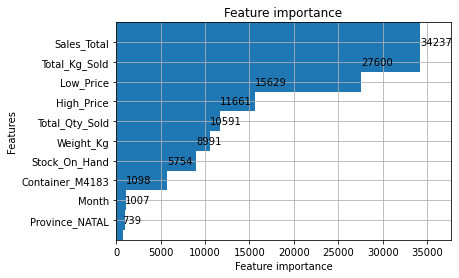

In [100]:
lgb.plot_importance(model_lgb,height=3, max_num_features=10) # We plot the important features

The LightGBM method has given us the lowest RMSE of all the models utilised. The most important features  are the sales total, total kg sold, low price, high price, total kg sold, weight, stock on hand and a specicif container. Of the 38 features, 8 were found to be the most important predictors  This highlights the strenght of the feature selection of LGBM

## **MODEL PERFORMANCE EVALUATION** <a class="anchor" id="MPE"></a>


The metric we will use for performance is the root mean squared error. The function is applied to the testing data, in order to evaluate the performance on unseen data.  The root mean squared error is a measure of the differences between values predicted by a model, and values observed. This measure indicates that absolute fit of the data, in other words it measures how close the predictions are to the actual values.  

We also considered the adjusted R Squared. R Squared is know as the coefficient of determination, which explains  the proportion of the variance in the dependent variable that is predictable from the independent variables.  There is a problem with using R Squared when there is more than one predictor.  When adding predictors to the model, the R Squared Always increases, and therefore it is not an accurate measure of the proportion of variance.  This is rectified by calculating the Adjusted R Squared Value.  This is done by only considering the features that have an impact. If the added variables do not have an impact on the dependant variable, then the Adjusted R Squared will decrease, and vice versa.

From the various models, we have obtained the root mean squared error and the adjusted r squared from the testing sets. We will represent the findings in graphical format.

In [101]:
#First, we create a dictionary of all the root mean squared errors of our data
rmse_dict = {u'MLR':1.3613543870705425, u'Ridge': 1.2045713048863274, u'Lasso':1.2006089316151665,u'DT': 0.6587341394072461,u'BSR': 0.5545918340594141,u'RF': 0.54050971916914,u'GB': 0.3585635192340126, u'LGB': 0.24434018814893796,}

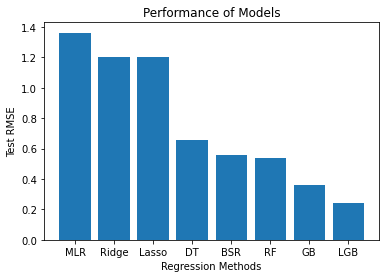

In [102]:
# we plot the performance of each model the RMSE
plt.bar(range(len(rmse_dict)), list(rmse_dict.values()), align='center')
plt.xticks(range(len(rmse_dict)), list(rmse_dict.keys()))
plt.title("Performance of Models")
plt.xlabel("Regression Methods")
plt.ylabel("Test RMSE")
plt.savefig('Results.png')

In [103]:
#Now, we create a dictionary of all the adjusted r squared values of our data
ar2_dict = {u'MLR':0.5574768122871763, u'Ridge': 0.6419528700928497, u'Lasso':0.6420826081545523,u'DT': 0.8922542854427962,u'BSR': 0.924067753248726,u'RF': 0.927458475615629,u'GB': 0.9680763996097654,u'LGB': 0.9851758612822966}

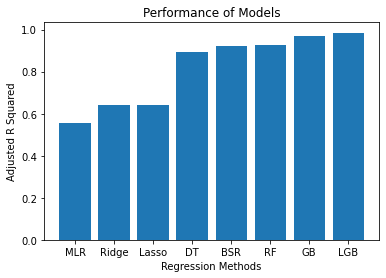

In [104]:
# we plot the performance of each model the RMSE
plt.bar(range(len(ar2_dict)), list(ar2_dict.values()), align='center')
plt.xticks(range(len(ar2_dict)), list(ar2_dict.keys()))
plt.title("Performance of Models")
plt.xlabel("Regression Methods")
plt.ylabel("Adjusted R Squared")
plt.savefig('R2.png')

From the two graphs we can see that the non-parametric methods outperform the parametric methods by quite a marging.

The models that performed the best are the ensemble methods, namely the Bootstarp Regressor, Random Forest, Gradient Boosting, and Light Gradient Boosting

The linear regression methods did not perform particularly well. There were no strong correlations between the various predictor variables and the outcome variable, and multicolinearity was an issue. This was rectified using both feature selection and the use of Ridge and Lasso regression, however, the results only improved marginally.

While the Gradient Boosting methods do give the best results, these methods are very computationally expensive.  Because of this, there has to be a remarkable improvement in performance to justify these methods.  In this case the use of Gradient Boosting is justified, because the perfomance is much higher than the other methods.

# **FINAL COMMENTS** <a class="anchor" id="Final_Comments"></a>


In conlcusion, we have developed a machine learning model, using light gradient boosting, that can reliably predict the price of a kilogram of golden delicious apples. The root mean squared error of our light gradient boosting model returned a root mean squared error of 0.2443 when tested. To put this into context: Our model predicts the price of a kilogram of golden delicious apples with a root mean squared error that is R0.24 away from real, observed data. We believe that this is a wholly defensible metric. 

It is also important to note, however, that this is just the best model that we have so far found for just this specific dataset that is avaliable to us. No machine learning regression model is ever final, and in order for a model such as this to be succesfully delpoyed within the apples industry will require near continous re-tweaking and evaluating over the medium to long-term.

## **APPENDIX - KAGGLE SUBMISSION** <a class="anchor" id="Kaggle"></a>


Getting the testing data in the same shape as the training data

In [105]:
df_test.date = pd.to_datetime(df_test.Date)
df_test["Quarter"] = df_test.date.dt.quarter
df_test["Month"] = df_test.date.dt.month
df_test["Year_Month"] = df_test.date.dt.year
df_test = season(df_test)
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,Season
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0,3,7,2020,Winter
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2,1,1,2020,Summer
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45,3,8,2020,Winter
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8,2,5,2020,Autumn
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,Autumn


In [106]:
df_test = df_test.drop('Date', axis=1)

In [107]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,Season
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,128.0,136.0,5008.0,38,456.0,0,3,7,2020,Winter
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,220.0,220.0,1760.0,8,146.4,2,1,1,2020,Summer
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,120.0,120.0,720.0,6,72.0,45,3,8,2020,Winter
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,160.0,160.0,160.0,1,18.3,8,2,5,2020,Autumn
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,Autumn


In [108]:
golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020,Spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020,Autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020,Autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020,Spring


In [109]:
df_test.shape

(685, 16)

In [110]:
golden_apple_train.shape

(1952, 16)

In [111]:
test_ID = df_test['Index']

In [112]:
df_test = df_test.drop('Index', axis=1)

In [113]:
df_test.shape

(685, 15)

In [114]:
X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
0,12.0,128.0,136.0,5008.0,38,456.0,0,3,7,2020,...,0,0,0,0,0,0,0,0,0,1
1,18.3,220.0,220.0,1760.0,8,146.4,2,1,1,2020,...,0,1,0,0,0,0,0,0,1,0
2,12.0,120.0,120.0,720.0,6,72.0,45,3,8,2020,...,0,0,0,0,0,0,0,0,0,1
3,18.3,160.0,160.0,160.0,1,18.3,8,2,5,2020,...,0,0,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,...,0,0,0,0,0,0,0,0,0,0


# LGBM Predictions

In [115]:
prediction_lgb = model_lgb.predict(X_real)

In [116]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
LGB_dart = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': prediction_lgb
    })

In [117]:
LGB_dart.head()

,Index,avg_price_per_kg
0,1,10.775434
1,2,12.364179
2,3,9.995534
3,4,8.764724
4,5,7.873272


In [118]:
LGB_dart.describe()

,Index,avg_price_per_kg
count,685.000000,685.000000
mean,343.000000,6.998352
std,197.886752,2.082015
min,1.000000,-0.608966
25%,172.000000,5.571002
50%,343.000000,6.830320
75%,514.000000,8.395287
max,685.000000,14.601424


In [119]:
LGB_dart.to_csv("lgb.csv", index=False)